# Projeto - Análise de Risco de Crédito

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [274]:
data_path = r"C:\Users\Usuario\OneDrive\Documentos\Projetos Visual Studio Code\DSNP 3.0\Datasets\acquisition_train.csv"

cred_risk_df = pd.read_csv(data_path)

cred_risk_df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [275]:
print('Dimensões do conjunto\n',
      f'\nEntradas: {cred_risk_df.shape[0]}',
      f'\nVariáveis: {cred_risk_df.shape[1]}')

print('\nNomes das colunas:')
cred_risk_df.columns

Dimensões do conjunto
 
Entradas: 45000 
Variáveis: 43

Nomes das colunas:


Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

### Dicionário de Variáveis

Observando os nomes de colunas e as primeiras entradas, podemos inferir algumas coisas. Além disso, se analisarmos cada variável em seus valores únicos, podemos deduzir o signficado, além de já identificar problemas nos dados:

- `ids`: identificadores dos clientes, aparentemente são _strings_ aleatórias que não serão úteis para a análise;
- `score_1, score_2`: variáveis de pontuação codificadas;
- `score_3, score_4, score_5, score_6`: variáveis numéricas que dizem respeito a pontuação do cliente. Pode ser útil para identificar inadimplentes;
- `risk_rate`: taxa de risco (de inadimplência?) do cliente (valores entre 0 e 1);
- `last_amount_borrowed`: registro do valor do último empréstimo do cliente;
- `last_borrowed_in_months`: número de meses desde o último empréstimo (36., nan, 60.);
- `credit_limit`: limite de crédito para determinado cliente;
- `income`: renda anual do cliente;
- `state, zip, channel, job_name, real_state`: dados demográficos, trabalho dos clientes (codificadas);
- `n_bankruptcies`: número de falências registradas do cliente ( 0.,  1., nan,  2.,  3.,  4.,  5.);
- `n_defaulted_loans`: número de calotes nos empréstimos (0., 1., nan, 2., 3., 5.);
- `n_accounts`: número de contas (valor inteiro);
- `n_issues`: número de problemas (valor inteiro);
- `application_time_applied`: tempo de aplicação (dados em horas, não está claro a que se refere);
- `email`: provedor de e-mail (outlook, gmail, etc);
- `external_data_provider_credit_checks_last_2_year`: coluna com 0 ou nan. Checagem de crédito nos últimos dois anos;
- `external_data_provider_credit_checks_last_year`, `external_data_provider_credit_checks_last_month`: Checagem de crédito no último ano (0., nan, 1.) e último mês (2, 1, 3, 0);
- `external_data_provider_email_seen_before`: E-mail visto antes (possui valores nan e discrepantes, como -999)
- `external_data_provider_first_name`: Primeiro nome do cliente;
- `external_data_provider_fraud_score`: Pontuação de fraude (não faz parte do escopo da nossa análise);
- `lat_lon`: tupla de valores de latitude e longitude;
- `marketing_channel`: canal de marketing (convite e-mail, radio, lista de espera, website, etc);
- `profile_phone_number`: número de telefone do cliente;
- `reported_income`: renda informada pelo cliente (float, mas poderia ser int);
- `shipping_state`, `shipping_zip_code`: estado de residência do cliente (BR-MG, BR-SP, etc) e CEP (int);
- `profile_tags`: lista com dicionários contendo tags de identificação (?) dos clientes ("{'tags': ['n19', 'n8']}", "{'tags': ['n6', 'n7', 'nim']}"). PS: dicionários formatados como string.
- `user_agent`: informações sobre pontos de acesso;
- `target_fraud`: variável que classifica uma transação fraudulenta ou não (fora do escopo do projeto);
- `target_default`: variável que classifica um cliente inadimplente ou não (**alvo**) (False, True, nan).

A análise dos valores únicos por coluna ajudou a identificar as colunas que já apresentavam problemas de valores discrepantes e ausentes, além daquelas cujos valores estão codificados. Como é uma análise feita manualmente, as células foram apagadas para não bagunçar o projeto.




### Análise da variável-alvo

Como visto, a variável `target_default` é o nosso alvo, contendo informações dos clientes regulares e inadimplentes. Vamos verificar algumas informações sobre ela, como valores únicos, proporções das classes e quantidade de valores nulos.

In [276]:
print('Valores na variável-alvo:')
cred_risk_df['target_default'].unique().tolist()

Valores na variável-alvo:


[False, True, nan]

In [277]:
print('Distribuição das classes:\n')

class_count = cred_risk_df['target_default'].value_counts()

print(class_count)

print('\nProporção no conjunto: \n')

class_0 = (class_count[0] * 100/ cred_risk_df.__len__()).round(2)
class_1 = (class_count[1] * 100/ cred_risk_df.__len__()).round(2)

print(f'False: \t{class_0} %',
      f'\nTrue: \t{class_1} %')

Distribuição das classes:

False    35080
True      6661
Name: target_default, dtype: int64

Proporção no conjunto: 

False: 	77.96 % 
True: 	14.8 %


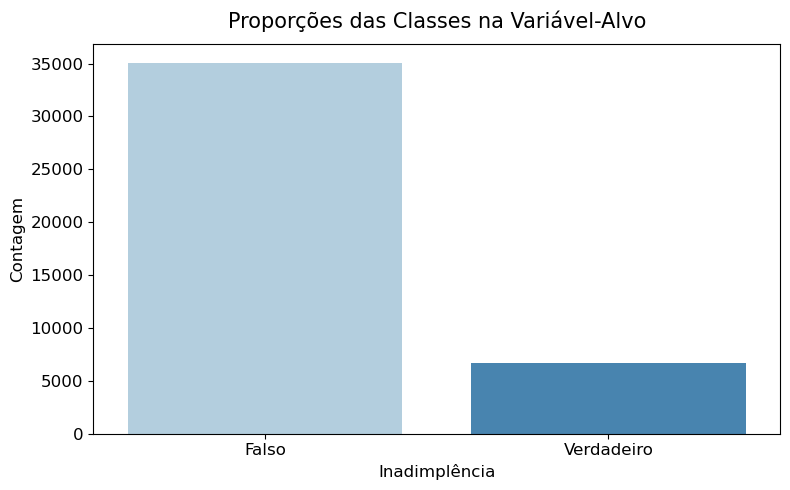

In [278]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.countplot(data = cred_risk_df, x = 'target_default', palette = 'Blues', ax = ax)

ax.set_title('Proporções das Classes na Variável-Alvo', fontsize = 15, pad = 12)
ax.set_ylabel('Contagem', fontsize = 12)
ax.set_xlabel('Inadimplência', fontsize = 12)
ax.set_xticklabels(['Falso', 'Verdadeiro'], fontdict = {'fontsize': 12})
ax.set_yticks(ticks = np.arange(0, 4e4, 5e3), 
              labels = [i for i in range(0, 40000, 5000)], 
              fontdict = {'fontsize': 12})

fig.tight_layout()

In [279]:
target_null = cred_risk_df['target_default'].isna().sum()

print(f'Quantidade de valores nulos no alvo: {target_null}')
print(f'Proporção de nulos no alvo: {(target_null * 100/ cred_risk_df.__len__()).round(2)} %')

Quantidade de valores nulos no alvo: 3259
Proporção de nulos no alvo: 7.24 %


Como podemos ver, nossa variável-alvo apresenta valores de verdadeiro, falso e valores ausentes que precisam ser tratados. Trata-se então de uma tarefa de classificação binária, com as seguintes classes:

- **True**: Clientes inadimplentes;
- **False**: Clientes regulares.

Iremos posteriormente codificar esses valores, de modo que a classe True seja mapeada com o valor 1 e classe False seja mapeada com o valor 0.

In [280]:
target_null = cred_risk_df['target_default'].isna().sum()
idx = cred_risk_df.loc[cred_risk_df['target_default'].isna()].index

if target_null > 0:
    
    cred_risk_df.drop(idx, axis = 0, inplace = True)

print(f'Valores nulo no alvo após limpeza: {target_null}')

Valores nulo no alvo após limpeza: 3259


In [281]:
le = LabelEncoder()

le.fit(cred_risk_df['target_default'])
cred_risk_df['target_default'] = le.transform(cred_risk_df['target_default'])

cred_risk_df['target_default'].unique()

array([0, 1])

In [282]:
cred_risk_df['target_default'].value_counts()

0    35080
1     6661
Name: target_default, dtype: int64

Agora, temos uma variável-alvo que contém apenas valores 1 ou 0 para as respectivas classes de cliente inadimplente ou não. Nesta seção, portanto, analisamos as proporções das classes no conjunto, tratamos os dados ausentes e estruturamos o problema de classificação binário, ao codificar os valores das classes para 0 ou 1.

## Análise Exploratória

### Informações do conjunto de dados

Agora que vimos informações sobre a variável-alvo, vamos seguir com a análise para outras variáveis do conjunto. Começaremos analisando a quantidade de valores ausentes, as colunas que serão removidas, e aquelas que serão imputadas com novos valores para preencher os ausentes.

In [283]:
print('Resumo de informações do conjunto, tipos e valores ausentes:\n')
cred_risk_df.info(verbose = True)

Resumo de informações do conjunto, tipos e valores ausentes:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               41741 non-null  object 
 1   target_default                                    41741 non-null  int32  
 2   score_1                                           41741 non-null  object 
 3   score_2                                           41741 non-null  object 
 4   score_3                                           41741 non-null  float64
 5   score_4                                           41741 non-null  float64
 6   score_5                                           41741 non-null  float64
 7   score_6                                           41741 non-null  float64
 8   risk_rate                         

### Tratamento de valores ausentes

In [284]:
print('Valores ausentes por coluna, ordenados de forma decrescente (%):')
round((cred_risk_df.isna().sum()) * 100 / cred_risk_df.__len__(), 2).sort_values(ascending = False)

Valores ausentes por coluna, ordenados de forma decrescente (%):


target_fraud                                        96.75
last_amount_borrowed                                66.14
last_borrowed_in_months                             66.14
ok_since                                            58.61
external_data_provider_credit_checks_last_2_year    50.38
external_data_provider_credit_checks_last_year      33.59
credit_limit                                        31.41
n_issues                                            26.17
facebook_profile                                     9.95
marketing_channel                                    7.93
job_name                                             6.27
external_data_provider_email_seen_before             5.00
lat_lon                                              3.02
user_agent                                           1.57
n_bankruptcies                                       0.32
n_defaulted_loans                                    0.03
reason                                               0.01
state         

Variáveis sem nenhum valor ausente:             

- `state`                                                
- `zip`                                                  
- `score_1`                                              
- `profile_tags`                                         
- `shipping_zip_code`                                   
- `shipping_state`                                      
- `reported_income`                                     
- `profile_phone_number`                                
- `score_2`                                             
- `score_3`                                             
- `external_data_provider_fraud_score`                  
- `external_data_provider_first_name`                
- `score_4`                                             
- `score_5`                                             
- `external_data_provider_credit_checks_last_month`     
- `score_6`                                             
- `email`                                               
- `application_time_in_funnel`                          
- `application_time_applied`                            
- `risk_rate`                                           
- `n_accounts`                                          
- `n_defaulted_loans`                                   
- `target_default`                                      
- `reason`                                              
- `real_state`                                          
- `income`                                              
- `channel`                                             
- `ids`                                                 

Dentre as variáveis que possuem valores ausentes, algumas não possuem nenhum significado para nossa análise e serão removidas.  Particularmente, as variáveis que dizem respeito à tarefa de detecção de fraudes, que não faz parte do escopo desse projeto, serão removidas. São elas: `target_fraud` e `external_data_provider_fraud_score`. Outras variáveis simplesmente não possuem nenhum poder preditivo para análise (e.g nome ou e-mail que a pessoa usa, perfil do Facebook) ou são de difícil interpretabilidade (e.g pontos de acesso, horários, etc), como `ids`, `email`, `external_data_provider_first_name`, `profile_phone_number`, `facebook_profile`, `user_agent`, `application_time_applied`, `external_data_provider_credit_checks_last_year`, `external_data_provider_credit_checks_last_2_year`, `reason`, etc.

Dentre as variáveis codificadas, temos: `state, zip, channel, job_name, real_state, score_1 e score_2`. Para as variáveis que não contém muitos valores únicos, podemos usar a abordagem do OHE (_One Hot Enconding_) para transpô-las em novas colunas como variáveis numéricas binárias (0 ou 1).

In [285]:
cred_risk_df[['state', 'zip', 'channel', 'job_name', 'real_state', 'score_1', 'score_2']].nunique().sort_values()

channel           1
real_state        5
score_1           7
score_2          35
state            50
zip             823
job_name      30543
dtype: int64

Apenas as variáveis `score_1` e `real_state` possuem poucos valores únicos. A variável `channel`, assim como `external_data_provider_credit_checks_last_2_year`, possui apenas um valor que por si só não oferece nenhum poder preditivo. Iremos removê-las posteriormente.

Poderíamos argumentar que o fato do cliente ser inadimplente pode ter a ver com seu emprego. Vamos analisar se existe algum tipo de emprego, na coluna `job_name`, que indique essa relação. 

In [286]:
count_jobs = cred_risk_df.loc[cred_risk_df['target_default'] == True]['job_name'].value_counts()

print(count_jobs[:10], '\n') 

print('Sumário Estatístico')

print(count_jobs.describe(percentiles = [.5, .75, .95, .99, .999]).round(1))

print(f'\nSoma das frequências de casos inadimplentes para empregos no percentil maior que 75%: {count_jobs.loc[count_jobs > 1].sum()}')

mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIaUIfpgwbYh438CvSsT5QB8=    19
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIbOy82w5K5LALfp4MHskDUE=    17
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIVf4E/iI7qK+Lfl5hxoWW2A=    16
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSISzmgfFzT+qYrtqTHkJFqpA=    12
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIUGp9a+9oBSLvyI5Jdz9fNg=    12
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIb4ADj/ykkhgM886TEQ8yrI=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIh/cdCiaVzVo/KVM2JldD+WiCpSDcTmA605zSPwbuinf0=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIV56G3kjZxQ0yMeb3IU2UKE=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1F

Os resultados aqui são interessantes. Os 5 primeiros itens da lista representam títulos de empregos que mais se repetem quando o cliente é inadimplente. Podemos ter a situação de que sejam apenas títulos mais comuns de empregos contra títulos mais raros, e.g comerciante vs piloto de avião, e por isso eles aparecem mais vezes na lista de clientes inadimplentes. 

Ao analisarmos o sumário estatístico, vemos que 99% dos empregos que aparecem na lista de inadimplentes o fazem até 4 vezes, significando que existe 1% de empregos que sempre que aparecem aumentam as chances do cliente ser previsto como inadimplente. Isto corresponde a 55 empregos. Acima disso, apenas 6 aparecem na lista de inadimplentes com uma frequência maior do que 11.

Se olharmos a proporçao da classe de inadimplentes do problema, ela representa 14,8% do conjunto (ou 6661 exemplos). Dos empregos que aparecem mais de uma vez na lista de inadimplentes, a soma das frequências não chega a 900. Isso mostra que, apesar de terem um potencial preditivo interessante, não constituem uma correlação tão forte, pois a maioria dos exemplos de inadimplentes não são previstos pelos top 25% empregos mais frequentes na lista de inadimplentes.

Por causa disto, e principalmente pela falta de interpretabilidade da variável codificada, ela será removida da análise.



Vamos analisar mais algumas variáveis, visando conhecer suas distribuições estatísticas e valores únicos. Assim, poderemos escolher quais iremos manter, quais remover e quais imputar valores.

### Construção de funções para análise

Como muitas das análises que iremos fazer para entender as variáveis são padronizadas, iremos construir funções para evitar redundância nos códigos.

#### Informações das variáveis

Essa função tem como objetivo imprimir informações relevantes sobre a variável em questão, como:

- Proporção de valores ausentes
- Sumário estatístico
- Valores únicos
- Tipo da variável

In [287]:
def variable_info(df, variable: str):
    isna_proportion = (df.isna().sum() * 100 / df.__len__()).sort_values(ascending = False).round(2)

    print(f'Variável {variable}\n')

    print(f'Proporção de valores ausentes: {isna_proportion[variable]}%\n')
    
    if df[variable].dtypes == 'O':
      
      print(f'Sumário Estatístico {variable}:\n')
      print(df[variable].describe())

      print(f'\nValores únicos:',
            f'\n{df[variable].unique()}',
            f'\n\nQuantidade de valores únicos: {df[variable].nunique()}')
                  
    else:
      
      print(f'Sumário Estatístico {variable}:\n')
      print(df[variable].describe().round(1))
      
      print(f'\nValores únicos:',
            f'\n{df[variable].unique()}',
            f'\n\nQuantidade de valores únicos: {df[variable].nunique()}')
            
      print('\nTipo da variável: ', df[variable].dtypes)

#### Plotar Boxplot

Essa função oferece uma visualização da estatística da variável através de um Boxplot da variável.

In [288]:
def plot_boxplot(variable: str):
    fig, ax = plt.subplots(figsize = (12, 3))
    
    sns.boxplot(
        data = cred_risk_df, 
        x = variable, 
        ax = ax, 
        palette = 'Reds', 
        showmeans = True
        )

    ax.set_title(f'Boxplot da Variável {variable}', fontsize = 14)
    ax.set_xlabel(f'{variable}', fontsize = 12)

    fig.tight_layout()

#### Boxplot de comparação com a variável-alvo

Essa visualização comparar as distribuições estatísticas da variável quando filtrada pelas classes do alvo, que nos diz se o cliente é inadimplente ou não.

In [289]:
def comparison_boxplot(variable: str):
    fig, ax = plt.subplots(figsize = (5, 6))

    sns.boxenplot(
        data = cred_risk_df,
        x = 'target_default', 
        y = variable,
        hue = 'target_default',
        palette = 'Blues',
        ax = ax,
    )

    ax.set_title(f'Comparação com o alvo - Variável {variable}', fontsize = 14)
    ax.set_xlabel('Inadimplente', fontsize = 12)
    ax.set_ylabel(f'{variable}', fontsize = 12)
    ax.set_xticklabels(['Falso', 'Verdadeiro'], fontdict = {'fontsize': 12})
    ax.legend(loc = 'lower center')

    fig.tight_layout()

#### Remover Outliers

Por fim, essa função remove _outliers_ de variáveis que necessitam desse tratamento. O limite superior é maior do que o usual, que normalmente é definido por $\text{IQR} + 1.5q_{3}$. No caso, calculamos o limite superior do IQR utilizando $\text{IQR} +  3q_{3}$, para não perder muitas entradas e manter alguns _outliers_ para o modelo aprender os padrões. 

In [290]:
def outlier_removal(variable: str):

    q3 = cred_risk_df[variable].quantile(.75)
    q1 = cred_risk_df[variable].quantile(.25)

    iqr = q3 - q1
    iqr_upper = iqr + 4 * q3

    print(f'Limite superior do IQR da variável {variable}: {iqr_upper}')
    n_outliers = cred_risk_df.loc[cred_risk_df[variable] > iqr_upper].shape[0]
    idx = cred_risk_df.loc[cred_risk_df[variable] > iqr_upper].index

    if n_outliers < 1000:
        
        cred_risk_df.drop(idx, axis = 0, inplace = True)
        print(f"{n_outliers} outliers removidos.")

### Análise das variáveis individuais

#### ok_since

A variável `ok_since` provavelmente nos passa a informação de quanto tempo o cliente está em uma situação normal de crédito.

In [291]:
variable_info(cred_risk_df, 'ok_since')

Variável ok_since

Proporção de valores ausentes: 58.61%

Sumário Estatístico ok_since:

count    17276.0
mean        35.2
std         21.6
min          0.0
25%         17.0
50%         32.0
75%         50.0
max        141.0
Name: ok_since, dtype: float64

Valores únicos: 
[ nan  50.  11.  35.  16.  19.  23.  43.  17.  29.  18.  56.  38.  93.
  27.  44.  13.   8.  66.  33.  12.  30.  24.  21.   7.  63.  51.  31.
  73.  49.   4.  48.  14.  76.  36.   5.  46.  41.  34.  59.  61.  55.
  84.  28.  75.   6.  67.  39.  52.  72.  10.  45.  32.  62.   0.  58.
  15.  78.  70.   9.  22.  80.  20.  68.  37.   3.  53.  60.  74.  26.
  47.   1.  42.  57.  40.  54.  65.  81.  25.  77.  71.  69.  64.  86.
  79.  82.   2.  83.  85. 103. 135.  97. 101.  90. 130. 141. 108.  88.
  95. 122.  87.] 

Quantidade de valores únicos: 100

Tipo da variável:  float64


Essa variável apresenta muitos valores ausentes. Porém, seu sumário estatístico não apresenta valores discrepantes e possui muitos valores distintos. Vamos mantê-la preenchendo os valores ausentes por sua mediana e testar no modelo.

Pode ser convertida para tipo _int_.

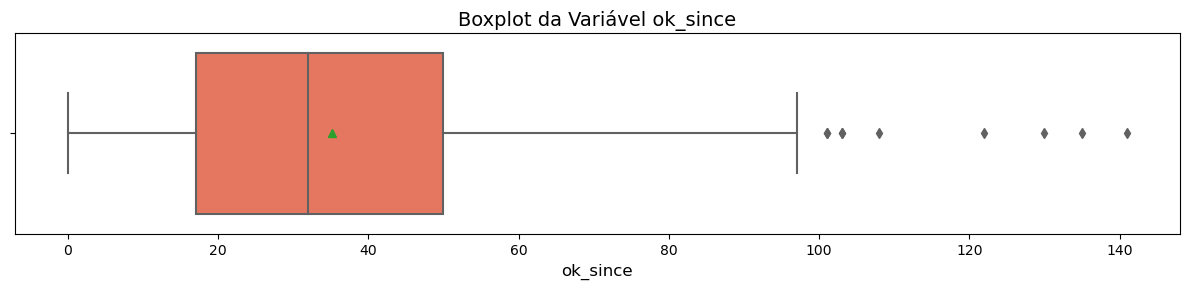

In [292]:
plot_boxplot('ok_since')

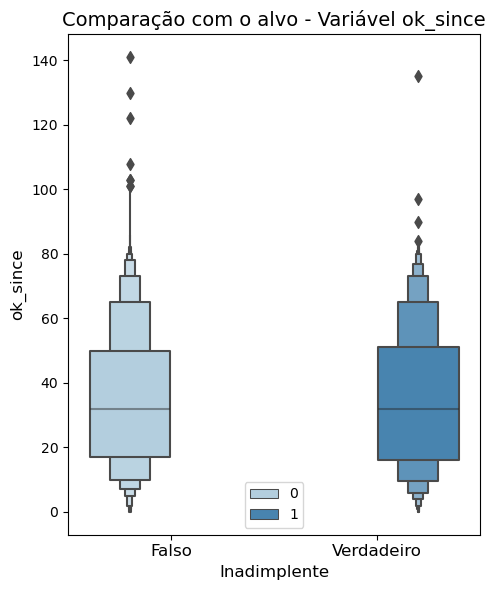

In [293]:
comparison_boxplot('ok_since')

Interessante notar que as distribuições estatísticas são parecidas na variável `ok_since` para ambas as classes no alvo. Contudo, fica claro que existem mais cliente classificados como normais que estão ok a mais tempo (note como a calda da classe 0 é maior, e como existem mais _outliers_ para valores altos). Contudo, essa análise deixa claro que existem outros fatores que influenciam na inadimplência, para além do tempo de fidelidade no pagamento do crédito, uma vez que existem muitos clientes inadimplentes que estavam ok há muito tempo.

#### last_amount_borrowed

A variável `last_amount_borrowed` traz informações dos valores que foram emprestados aos clientes na última vez.

In [294]:
variable_info(cred_risk_df, 'last_amount_borrowed')

Variável last_amount_borrowed

Proporção de valores ausentes: 66.14%

Sumário Estatístico last_amount_borrowed:

count    14133.0
mean     13328.1
std       7918.7
min       1005.2
25%       7210.3
50%      12011.0
75%      18030.2
max      35059.6
Name: last_amount_borrowed, dtype: float64

Valores únicos: 
[25033.92      nan  7207.92 ...  5022.86 14766.42  4226.74] 

Quantidade de valores únicos: 13480

Tipo da variável:  float64


Apesar da grande quantidade de valores ausentes, ainda temos muitos valores únicos. Não existem muitos valores discrepantes também, pois os valores da média e da mediana são próximos na estatística descritiva da variável. O maior problema, de fato, são as muitas entradas com valores ausentes. Não temos como saber o motivo específico dessa falta, mas temos duas alternativas: preencher com a mediana, ou zeros.

Iremos preencher com a mediana pois, para a porção de cliente normais que são bons pagadores, a mediana irá informar que eles, no mínimo, pagaram o que foi emprestado, enquanto que para o inadimplentes, a mediana irá dimensionar o peso que o valor do empréstimo tem na condição de inadimplência. Se preenchêssemos com zeros, os exemplos de inadimplentes não teriam nenhum valor emprestado, o que pode de alguma forma náo ser representativo da realidade (i.e, inadimplentes necessariamente precisam tomar um empréstimo antes de se tornarem inadimplentes).

Obviamente são suposições que temos que fazer devido à falta de visão de como o conjunto de dados foi estruturado.

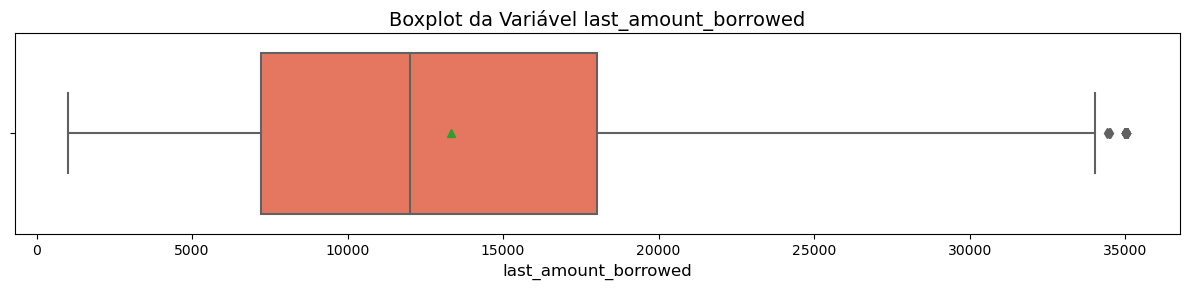

In [295]:
plot_boxplot('last_amount_borrowed')

#### last_borrowed_in_months

Essa variável diz respeito a quantidade de meses desde o último empréstimo de um cliente.

In [296]:
variable_info(cred_risk_df, 'last_borrowed_in_months')

Variável last_borrowed_in_months

Proporção de valores ausentes: 66.14%

Sumário Estatístico last_borrowed_in_months:

count    14133.0
mean        40.6
std          9.4
min         36.0
25%         36.0
50%         36.0
75%         36.0
max         60.0
Name: last_borrowed_in_months, dtype: float64

Valores únicos: 
[36. nan 60.] 

Quantidade de valores únicos: 2

Tipo da variável:  float64


Note que a proporção de valores ausentes é o mesmo da variável que diz a quantidade do último empréstimo. Não sabemos se correspondem às mesmas entradas.

Vamos verificar se as entradas ausentes correspondem às mesmas para as duas variáveis, `last_amount_borrowed` e `last_borrowed_in_months`. Iremos utilizar o método _loc_ com duas condições: filtrar as entradas ausentes para as duas colunas.

In [297]:
print('Quantidade de entradas ausentes comuns entre as duas variáveis:')
print(round(cred_risk_df.loc[(cred_risk_df['last_amount_borrowed'].isna()) & (cred_risk_df['last_borrowed_in_months']).isna()].shape[0] * 100/ cred_risk_df.__len__(), 2), '%')

Quantidade de entradas ausentes comuns entre as duas variáveis:
66.14 %


Verificamos que todas as entradas ausentes de `last_borrowed_in_months` correspondem às da variável `last_amount_borrowed`. Iremos imputar o valor da mediana, para representar que o valor foi emprestado há um determinado tempo para esses exemplos, evitando assim que o algoritmo interprete que o valor acabou de ser emprestado.

#### credit_limit

Essa variável mostra o limite de crédito liberado para os clientes do banco.

In [298]:
variable_info(cred_risk_df, 'credit_limit')

Variável credit_limit

Proporção de valores ausentes: 31.41%

Sumário Estatístico credit_limit:

count     28632.0
mean      33877.2
std       36142.0
min           0.0
25%        9975.0
50%       25213.0
75%       46492.5
max      448269.0
Name: credit_limit, dtype: float64

Valores únicos: 
[    0. 39726.    nan ... 10431. 36262. 17942.] 

Quantidade de valores únicos: 19336

Tipo da variável:  float64


A média do limite de crédito é de R$ 33877, e a mediana é de R$ 25213. Essa discrepância nesses dois parâmetros se deve ao fato de haver muitos _outliers_ nessa variável, _i.e_, pessoas que possuem um limite de crédito muito alto.

Essa variável já possui uma proporção menor de valores ausentes, tornando possível imputar os valores a partir das informações do sumário estatístico, especificamente a mediana. Iremos fazer esse tratamento nas etapas posteriores. Outra coisa é o tipo da variável, que pode ser convertido para _int_.

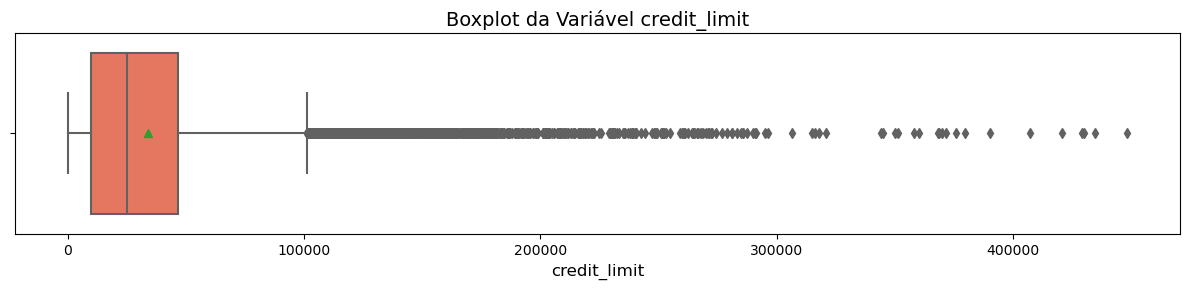

In [299]:
plot_boxplot('credit_limit')

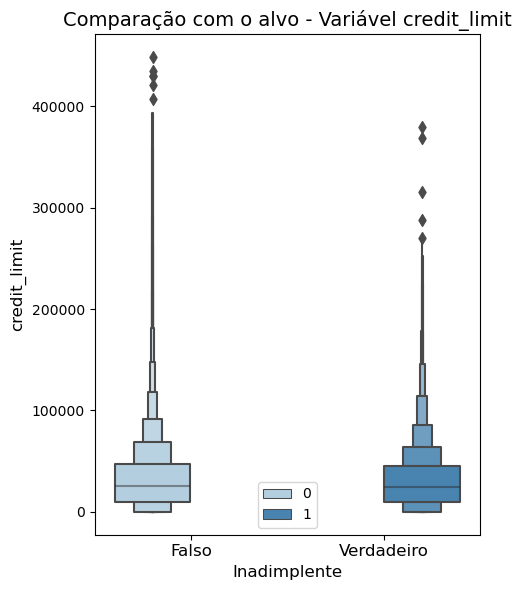

In [300]:
comparison_boxplot('credit_limit')

Note porém, que os _outliers_ são bem informativo para essa variável. Vemos que os clientes classificados como normais possuem limites de crédito mais altos se comparado com os limites de crédito dos inadimplentes.

#### n_issues

Essa variável reporta a quantidade de problemas (reclamações dos clientes ou problemas da empresa com o cliente?). Não há mais detalhes sobre ela.

In [301]:
variable_info(cred_risk_df, 'n_issues')

Variável n_issues

Proporção de valores ausentes: 26.17%

Sumário Estatístico n_issues:

count    30818.0
mean        11.0
std          4.6
min          0.0
25%          8.0
50%         10.0
75%         14.0
max         49.0
Name: n_issues, dtype: float64

Valores únicos: 
[18. 14. nan 19.  9.  7.  8. 16. 20.  5. 13. 12. 23. 22. 11.  6. 15. 17.
 21.  4. 10.  3. 24. 25. 30.  2. 27. 37. 26. 29. 28. 40. 34. 49.  1. 31.
 32. 39. 42. 33. 36. 35.  0. 41. 38.] 

Quantidade de valores únicos: 44

Tipo da variável:  float64


Outra variável que iremos preencher os valores ausentes com a mediana, uma vez que a proporção de valores nulos é de 25,7%. Além disso, pode ser convertida para tipo _int_.

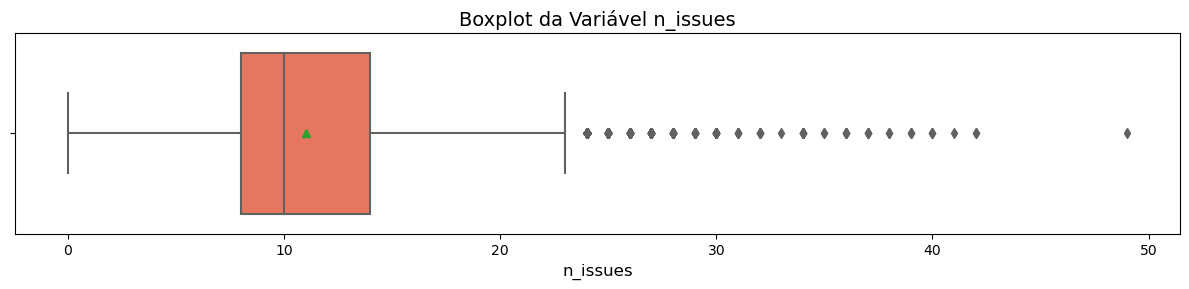

In [302]:
plot_boxplot('n_issues')

#### external_data_provider_email_seen_before

In [303]:
variable_info(cred_risk_df, 'external_data_provider_email_seen_before')

Variável external_data_provider_email_seen_before

Proporção de valores ausentes: 5.0%

Sumário Estatístico external_data_provider_email_seen_before:

count    39656.0
mean        12.7
std        125.7
min       -999.0
25%         11.0
50%         27.0
75%         43.0
max         59.0
Name: external_data_provider_email_seen_before, dtype: float64

Valores únicos: 
[  51.   17.    9.   38.   46.   21.   16.   37.    6.   nan   10.   29.
   43.   59.   54.   13.   52.    4.   31.   40.   -1. -999.   26.   48.
   50.    5.    3.   39.   11.    0.   58.   55.    2.    1.   53.   15.
   23.   24.   44.   14.   25.   34.   35.   12.   27.   49.    7.   36.
   47.   57.   20.    8.   18.   30.   42.   28.   41.   56.   32.   33.
   19.   22.   45.] 

Quantidade de valores únicos: 62

Tipo da variável:  float64


Essa variável apresenta dois valores discrepantes de -999 e -1. Esses valores não correspondem à realidade que a variável quer transmitir e, por isso, serão substituídos por zero.

In [304]:
# Identificar as entradas com valores estranhos
idx = cred_risk_df.loc[cred_risk_df['external_data_provider_email_seen_before'] == -999.].index
idx2 = cred_risk_df.loc[cred_risk_df['external_data_provider_email_seen_before'] == -1.].index
# Contar o número de entradas e somar numa variável
entries_1 = cred_risk_df.loc[cred_risk_df['external_data_provider_email_seen_before'] == -999.].shape[0]
entries_2 = cred_risk_df.loc[cred_risk_df['external_data_provider_email_seen_before'] == -1.].shape[0]
num_entries = entries_1 + entries_2

# Substituindo valores negativos por zero
if num_entries != 0:
    cred_risk_df['external_data_provider_email_seen_before'].replace({-1.: 0, -999.: 0}, inplace = True)

print('Valores Negativos substituídos com sucesso!\n')

print('Sumário estatístico da variável:')
print(cred_risk_df['external_data_provider_email_seen_before'].describe().round(1))

Valores Negativos substituídos com sucesso!

Sumário estatístico da variável:
count    39656.0
mean        27.6
std         18.1
min          0.0
25%         11.0
50%         27.0
75%         43.0
max         59.0
Name: external_data_provider_email_seen_before, dtype: float64


Agora temos um sumário estatístico correto. Iremos preencher os valores ausentes que restaram pelo valor da mediana, uma vez que eles correspondem a 5% das entradas do conjunto nessa variável.

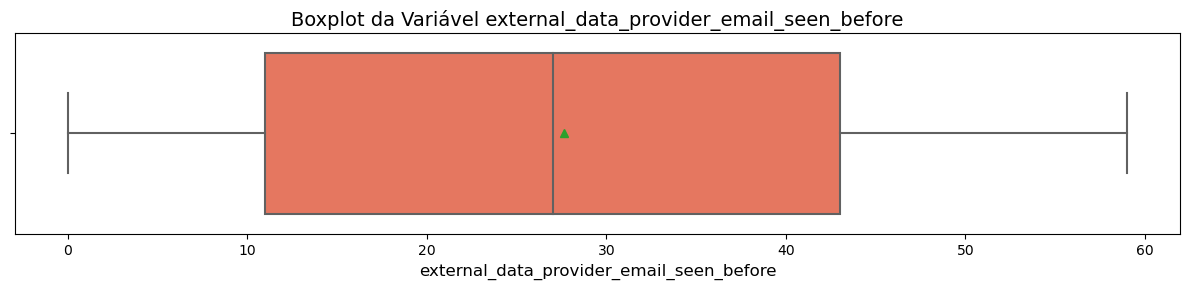

In [305]:
plot_boxplot('external_data_provider_email_seen_before')

#### n_bankruptcies

In [306]:
variable_info(cred_risk_df, 'n_bankruptcies')

Variável n_bankruptcies

Proporção de valores ausentes: 0.32%

Sumário Estatístico n_bankruptcies:

count    41606.0
mean         0.1
std          0.3
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          5.0
Name: n_bankruptcies, dtype: float64

Valores únicos: 
[ 0.  1. nan  2.  3.  4.  5.] 

Quantidade de valores únicos: 6

Tipo da variável:  float64


No caso dessa variável, iremos substituir os valores ausentes por zero. Além disso, ela pode ser convertida para o tipo _int_.

In [307]:
bankruptcies_isna = cred_risk_df['n_bankruptcies'].isna().sum()

if bankruptcies_isna > 0:
    cred_risk_df['n_bankruptcies'].fillna(0, inplace = True)

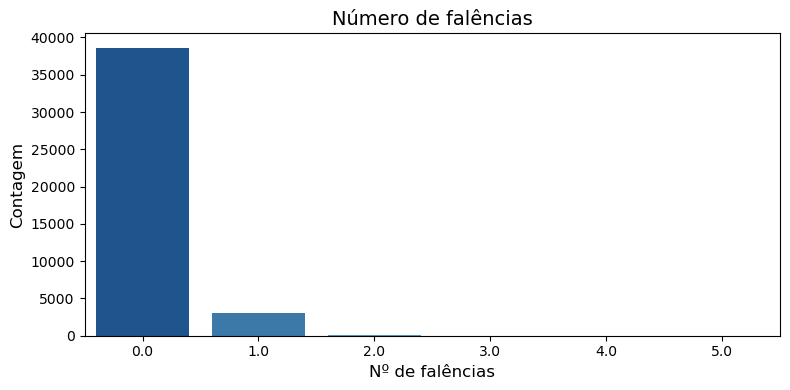

In [308]:
fig,ax = plt.subplots(figsize = (8, 4))

sns.countplot(cred_risk_df, x = 'n_bankruptcies', palette = 'Blues_r', ax = ax)

ax.set_title('Número de falências', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 12)
ax.set_xlabel('Nº de falências', fontsize = 12)

fig.tight_layout()

Como é de se esperar, a maioria dos clientes nunca reportou nenhuma falência. A proporção daqueles que reportaram uma falência é mais de 8 vezes menor do que a quantidade de clientes que nunca faliu, enquanto as proporções dos que reportaram duas ou mais falências é ínfima.

#### marketing_channel

Essa variável mostra quantos clientes vieram de cada canal de marketing.

In [309]:
variable_info(cred_risk_df, 'marketing_channel')

Variável marketing_channel

Proporção de valores ausentes: 7.93%

Sumário Estatístico marketing_channel:

count       38433
unique          9
top       Website
freq        10163
Name: marketing_channel, dtype: object

Valores únicos: 
['Invite-email' 'Radio-commercial' 'Waiting-list' 'Website' 'Twitter'
 'Facebook' nan 'Instagram' 'Invite-web' 'LinkedIn'] 

Quantidade de valores únicos: 9


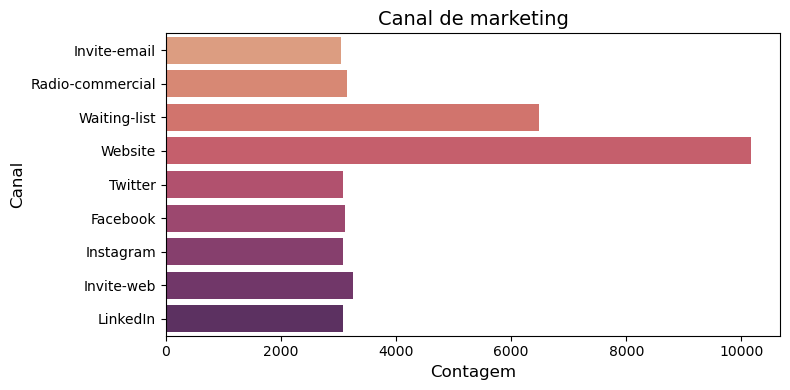

In [310]:
fig,ax = plt.subplots(figsize = (8, 4))

mkt_count = cred_risk_df['marketing_channel'].value_counts().sort_values(ascending = False)

sns.countplot(cred_risk_df, y = 'marketing_channel', palette = 'flare')

ax.set_title('Canal de marketing', fontsize = 14)
ax.set_ylabel('Canal', fontsize = 12)
ax.set_xlabel('Contagem', fontsize = 12)

fig.tight_layout()

Segundo as estatísticas, mais de 10 mil clientes vieram da Internet através do site. Em segundo lugar aparece a lista de espera, com mais de 6 mil clientes vindos de lá. Os outros canais todos contribuem de maneira igual.

#### n_defaulted_loans

Essa variável reporta quantos clientes já tiveram empréstimos inadimplentes no passado, informando a quantidade.

In [311]:
variable_info(cred_risk_df, 'n_defaulted_loans')

Variável n_defaulted_loans

Proporção de valores ausentes: 0.03%

Sumário Estatístico n_defaulted_loans:

count    41729.0
mean         0.0
std          0.1
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          5.0
Name: n_defaulted_loans, dtype: float64

Valores únicos: 
[ 0.  1. nan  2.  3.  5.] 

Quantidade de valores únicos: 5

Tipo da variável:  float64


In [312]:
cred_risk_df['n_defaulted_loans'].value_counts()

0.0    41564
1.0      144
2.0       16
3.0        4
5.0        1
Name: n_defaulted_loans, dtype: int64

Vemos que a esmagadora maioria nunca teve nenhum empréstimo inadimplente. O número de clientes com 1 ou mais inadimplências no histórico não passa de 0,01% do conjunto de dados.

Além disso, a variável possui poucas entradas com valores ausentes que podem ser substituídas por zero, dado que é o valor mais provável.

#### n_accounts

In [313]:
variable_info(cred_risk_df, 'n_accounts')

Variável n_accounts

Proporção de valores ausentes: 0.0%

Sumário Estatístico n_accounts:

count    41741.0
mean        10.6
std          4.6
min          0.0
25%          7.0
50%         10.0
75%         13.0
max         49.0
Name: n_accounts, dtype: float64

Valores únicos: 
[18. 14. 10. 19. 11.  9.  8.  7. 16.  6. 20.  5. 13.  4. 12. 23. 22. 15.
 17. 21.  3. 24. 28.  2. 25. 30. 27. 37. 26. 29. 33. 35. 34. 40. 49. 31.
  1. 32. 39. 42. 36.  0. 41. 38.] 

Quantidade de valores únicos: 44

Tipo da variável:  float64


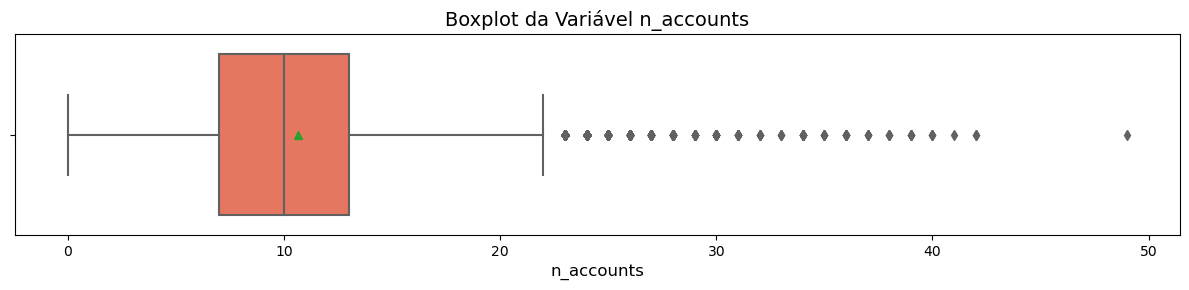

In [314]:
plot_boxplot('n_accounts')

#### risk_rate

In [315]:
variable_info(cred_risk_df, 'risk_rate')

Variável risk_rate

Proporção de valores ausentes: 0.0%

Sumário Estatístico risk_rate:

count    41741.0
mean         0.3
std          0.1
min          0.0
25%          0.2
50%          0.3
75%          0.4
max          0.9
Name: risk_rate, dtype: float64

Valores únicos: 
[0.4  0.24 0.29 0.32 0.18 0.44 0.43 0.33 0.36 0.22 0.12 0.27 0.34 0.38
 0.25 0.13 0.15 0.19 0.23 0.28 0.21 0.35 0.41 0.42 0.26 0.31 0.3  0.51
 0.08 0.17 0.2  0.09 0.45 0.46 0.37 0.16 0.39 0.49 0.11 0.54 0.48 0.04
 0.59 0.07 0.5  0.58 0.53 0.47 0.1  0.14 0.05 0.52 0.72 0.55 0.56 0.06
 0.57 0.61 0.7  0.6  0.62 0.65 0.63 0.8  0.78 0.77 0.66 0.03 0.64 0.73
 0.75 0.67 0.68 0.69 0.74 0.   0.71 0.9  0.76 0.02 0.81] 

Quantidade de valores únicos: 81

Tipo da variável:  float64


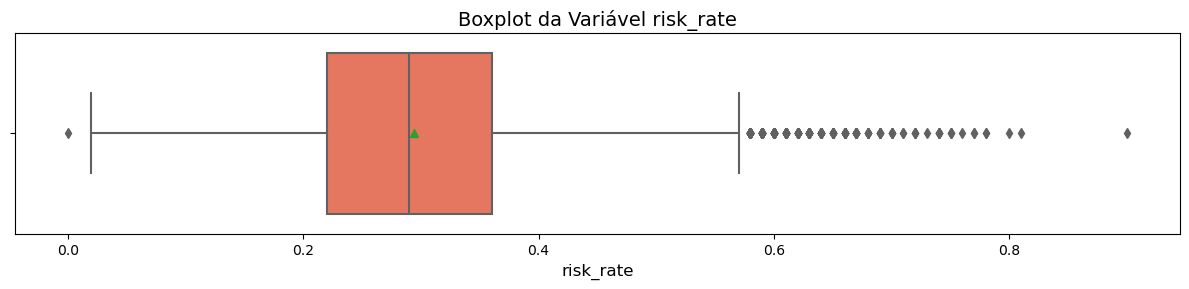

In [316]:
plot_boxplot('risk_rate')

#### income

In [317]:
variable_info(cred_risk_df, 'income')

Variável income

Proporção de valores ausentes: 0.0%

Sumário Estatístico income:

count      41741.0
mean       71080.1
std        52259.8
min         4821.2
25%        44019.6
50%        60044.1
75%        85032.9
max      5000027.8
Name: income, dtype: float64

Valores únicos: 
[ 65014.12 100018.91  65023.65 ... 106020.9  185018.07  34013.65] 

Quantidade de valores únicos: 38849

Tipo da variável:  float64


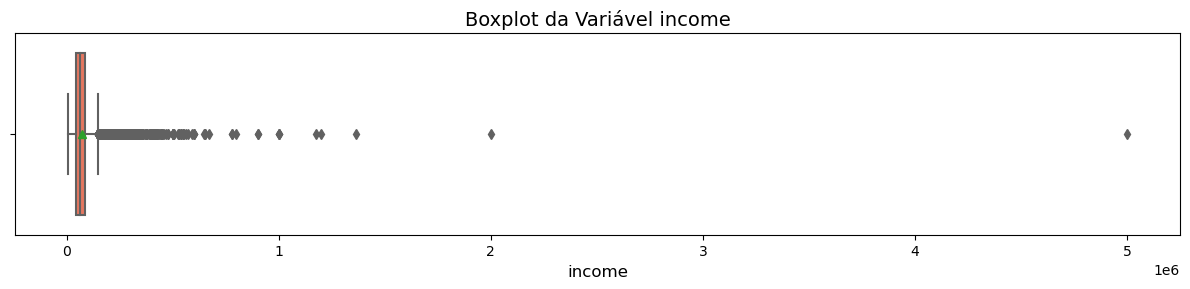

In [318]:
plot_boxplot('income')

Nota-se que a variável `income` apresenta valores muito discrepantes, que enviesam de tal maneira a distribuição dos dados que se torna impossível visualizar a estatística pelo Boxplot.

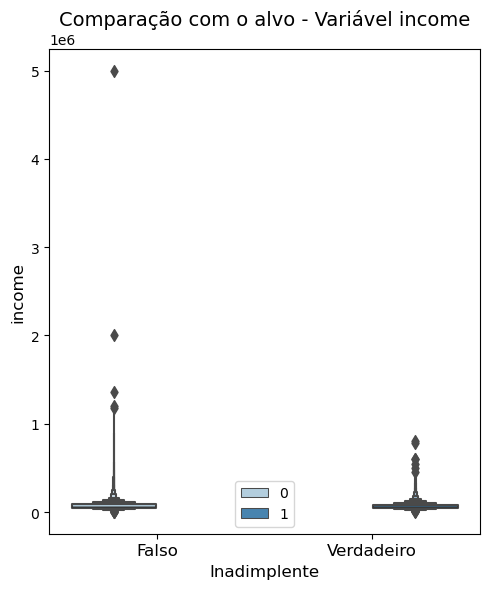

In [319]:
comparison_boxplot('income')

O mesmo acontece ao compararmos as distribuições dos dados segundo as classes da variável-alvo. Iremos remover esses _outliers_, uma vez que eles podem enviesar o algoritmo, caso ele seja sensível a _outliers_, ajustando uma função que não será acurada em dados novos gerais. Além disso, até para algoritmos que lidam bem com _outliers_, a remoção permitirá que o algoritmo foque mais onde há maior volume de dados na distribuição, visualizando melhor estatísticas para abstrair padrões.

In [320]:
outlier_removal('income')

Limite superior do IQR da variável income: 381144.87
87 outliers removidos.


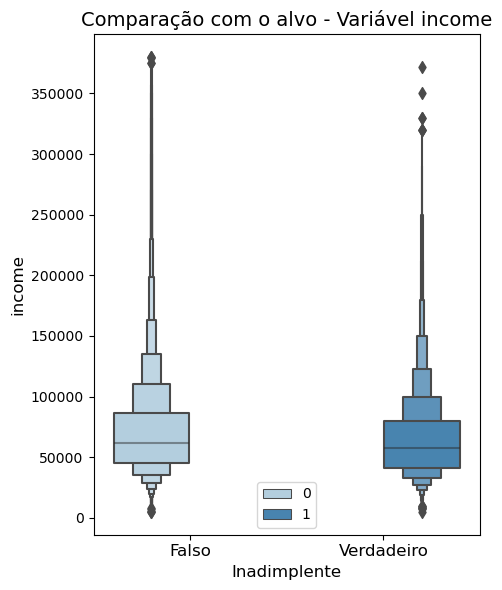

In [321]:
comparison_boxplot('income')

Da análise estatística, é possível notar que a classe de clientes normais possuem uma mediana de renda maior do que os inadimplentes. Possuem também, uma quantidade maior de clientes com renda maior, uma vez que a calda do boxplot é mais alongada para os cliente normais.

#### reported_income

In [322]:
variable_info(cred_risk_df, 'reported_income')

Variável reported_income

Proporção de valores ausentes: 0.0%

Sumário Estatístico reported_income:

count     41654.0
mean          inf
std           NaN
min         403.0
25%       50969.5
50%      101621.0
75%      151232.2
max           inf
Name: reported_income, dtype: float64

Valores únicos: 
[ 57849.   4902. 163679. ...  73417.  26246. 112766.] 

Quantidade de valores únicos: 37302

Tipo da variável:  float64


In [323]:
print('A variável possui {} entradas com valores tidos como infinito.'.format(cred_risk_df.loc[cred_risk_df['reported_income'] == np.inf].shape[0]))

A variável possui 66 entradas com valores tidos como infinito.


In [324]:
inf_idx = cred_risk_df.loc[cred_risk_df['reported_income'] == np.inf].index
n_inf_entries = cred_risk_df.loc[cred_risk_df['reported_income'] == np.inf].shape[0]

if n_inf_entries != 0:
    cred_risk_df.drop(inf_idx, axis = 0, inplace = True)
    print('Valores infinitos removidos!')

Valores infinitos removidos!


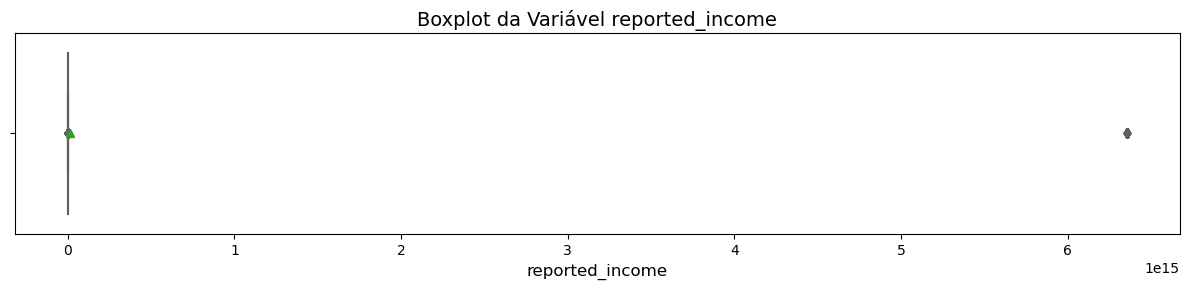

In [325]:
plot_boxplot('reported_income')

In [326]:
outlier_removal('reported_income') 

print('\nNova estatística: \n')
print(cred_risk_df['reported_income'].describe().round(2))

Limite superior do IQR da variável reported_income: 704615.25
315 outliers removidos.

Nova estatística: 

count     41273.00
mean     100309.35
std       57537.90
min         403.00
25%       50508.00
50%      100736.00
75%      150066.00
max      200000.00
Name: reported_income, dtype: float64


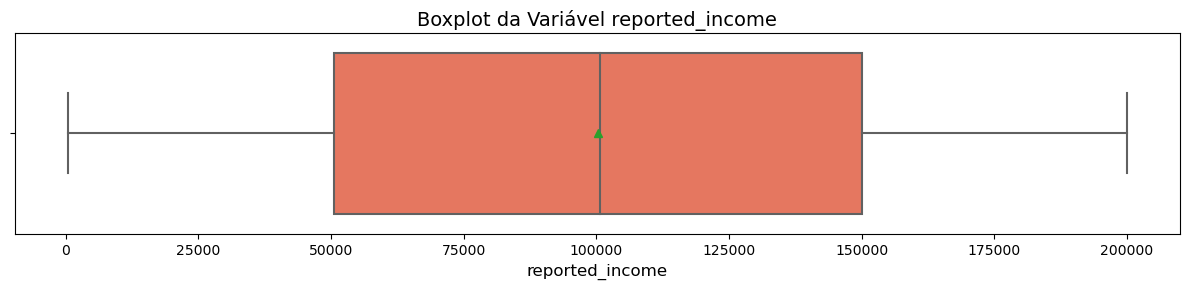

In [327]:
plot_boxplot('reported_income')

#### application_time_in_funnel

In [328]:
variable_info(cred_risk_df, 'application_time_in_funnel')

Variável application_time_in_funnel

Proporção de valores ausentes: 0.0%

Sumário Estatístico application_time_in_funnel:

count    41273.0
mean       247.9
std        146.3
min          0.0
25%        120.0
50%        248.0
75%        375.0
max        500.0
Name: application_time_in_funnel, dtype: float64

Valores únicos: 
[444 346   6 406 240 169  74 184 420   7 243  53 296 316 216 165 448 350
 291 131 173 366  18   5 116 455  30 458 258   9 411 239  48 400 362 480
 251 410  57  93  99 159 436 153 113  28 290  49 274  42 456  32 312 288
 313 364  60 193  45 398  35 485 405 332 425  80 146  50 194 337 254  96
 178 360  77 203 242 383 292 126 278 482  88 144 253 209 423 500  65 266
 289 271 111 416 465 472 132  84 196 112 442 130 120 345 208  72  19  15
 441 267 387 192 319 272 374 453  89 421 433  21 435  70 463 419 213 256
  71 305 408 475 238 379 107 220 235 125 100  41 177 175 393  27 300 214
 318 212  63 417 497 273 249 321 414  37 394 299  25 121 151 357 344  67
 341 174 388 114 

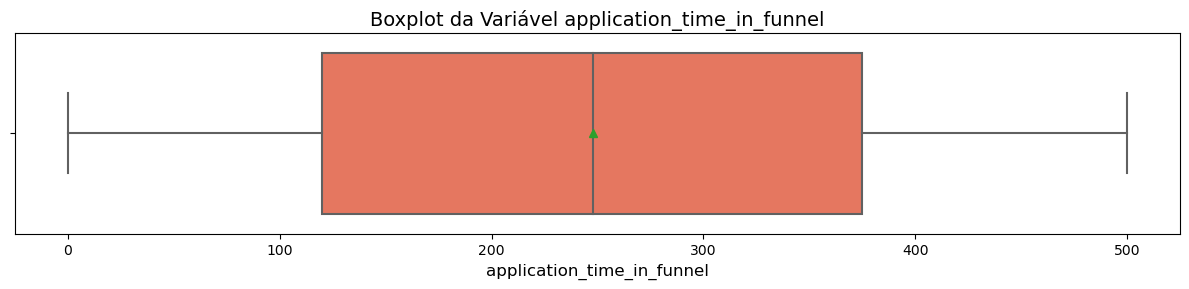

In [329]:
plot_boxplot('application_time_in_funnel')

#### score_3

In [330]:
variable_info(cred_risk_df, 'score_3')

Variável score_3

Proporção de valores ausentes: 0.0%

Sumário Estatístico score_3:

count    41273.0
mean       346.7
std        110.1
min          0.0
25%        270.0
50%        340.0
75%        420.0
max        990.0
Name: score_3, dtype: float64

Valores únicos: 
[350. 370. 360. 510. 500. 300. 250. 330. 390. 340. 460. 400. 310. 190.
 210. 590. 280. 260. 320. 420. 450. 240. 430. 530. 470. 270. 290. 570.
 180. 220. 620. 520. 560. 490. 200. 440. 230. 480. 410. 170. 160. 140.
 780. 380. 540. 550. 650.  80. 150. 580. 100. 690. 630. 640. 110. 600.
 120. 130. 670. 610. 730. 660.  70. 680. 760. 700. 720. 820.  90. 710.
  50.  30.  20. 750. 810. 790. 770.  60.  40. 740. 840. 910. 860. 990.
 880. 850.   0.] 

Quantidade de valores únicos: 87

Tipo da variável:  float64


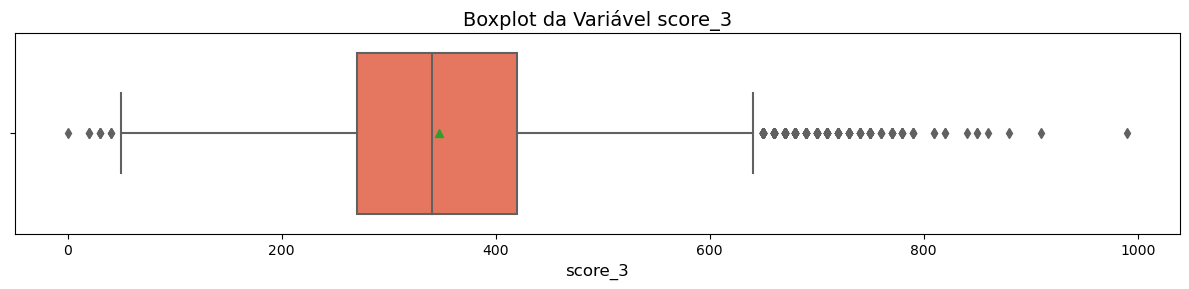

In [331]:
plot_boxplot('score_3')

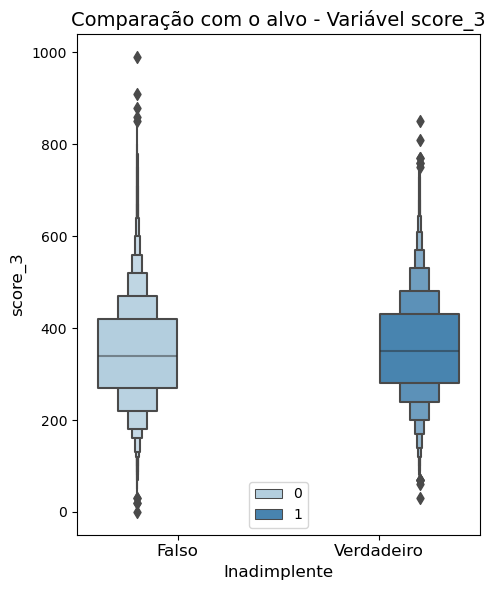

In [332]:
comparison_boxplot('score_3')

#### score_4

In [333]:
variable_info(cred_risk_df, 'score_4')

Variável score_4

Proporção de valores ausentes: 0.0%

Sumário Estatístico score_4:

count    41273.0
mean       100.0
std          3.2
min         86.2
25%         97.9
50%        100.0
75%        102.1
max        114.0
Name: score_4, dtype: float64

Valores únicos: 
[101.80083171  97.06261531 100.02707252 ... 102.37778011 100.47609005
 101.09581302] 

Quantidade de valores únicos: 41273

Tipo da variável:  float64


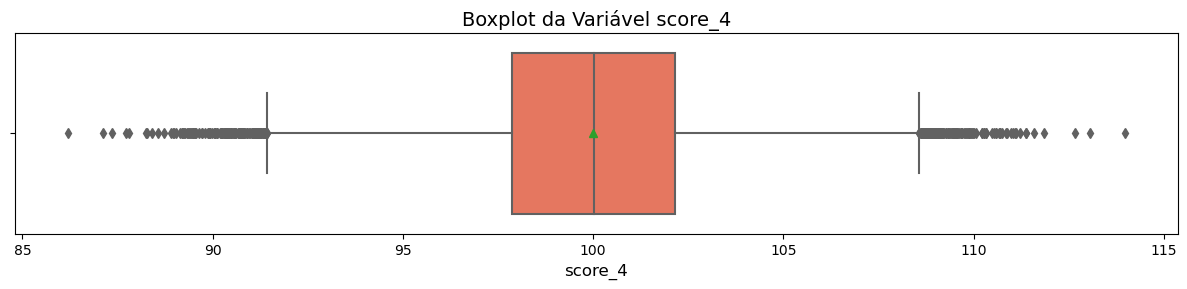

In [334]:
plot_boxplot('score_4')

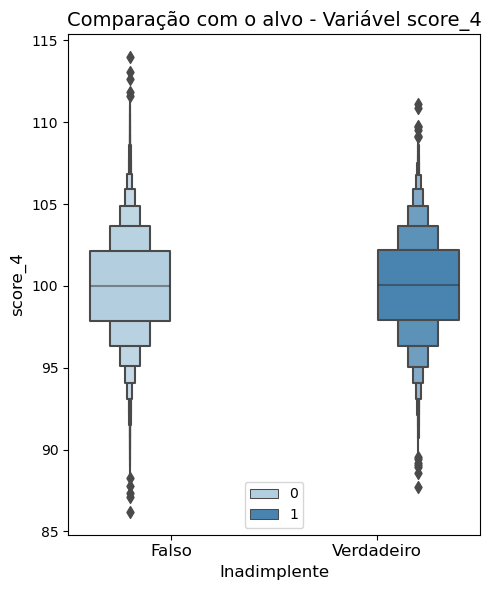

In [335]:
comparison_boxplot('score_4')

#### score_5

In [336]:
variable_info(cred_risk_df, 'score_5')

Variável score_5

Proporção de valores ausentes: 0.0%

Sumário Estatístico score_5:

count    41273.0
mean         0.5
std          0.3
min          0.0
25%          0.3
50%          0.5
75%          0.7
max          1.0
Name: score_5, dtype: float64

Valores únicos: 
[0.25955467 0.94265452 0.3519176  ... 0.53093815 0.21469687 0.01136926] 

Quantidade de valores únicos: 41273

Tipo da variável:  float64


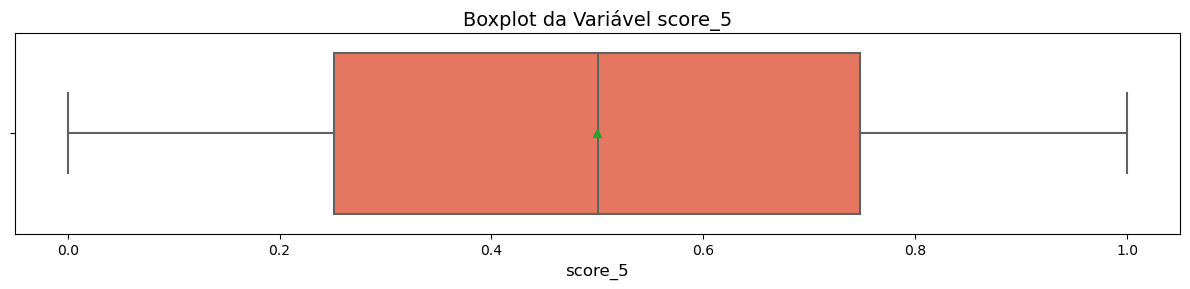

In [337]:
plot_boxplot('score_5')

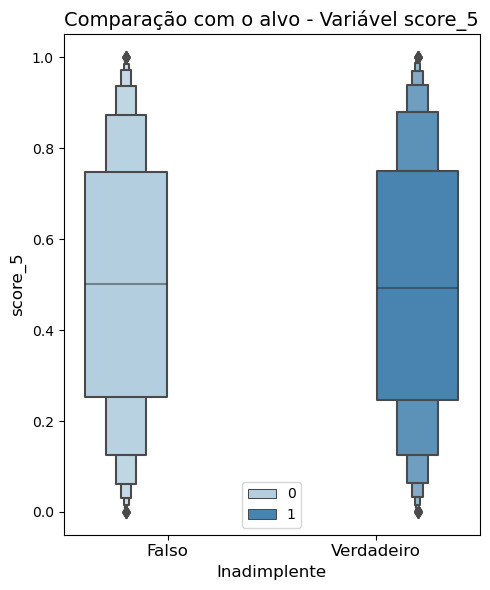

In [338]:
comparison_boxplot('score_5')

#### score_6

In [339]:
variable_info(cred_risk_df, 'score_6')

Variável score_6

Proporção de valores ausentes: 0.0%

Sumário Estatístico score_6:

count    41273.0
mean        99.9
std         10.0
min         60.7
25%         93.2
50%        100.0
75%        106.6
max        142.2
Name: score_6, dtype: float64

Valores únicos: 
[108.42727282  92.00254553 112.89245295 ...  93.68774717  86.75907422
  97.36291829] 

Quantidade de valores únicos: 41273

Tipo da variável:  float64


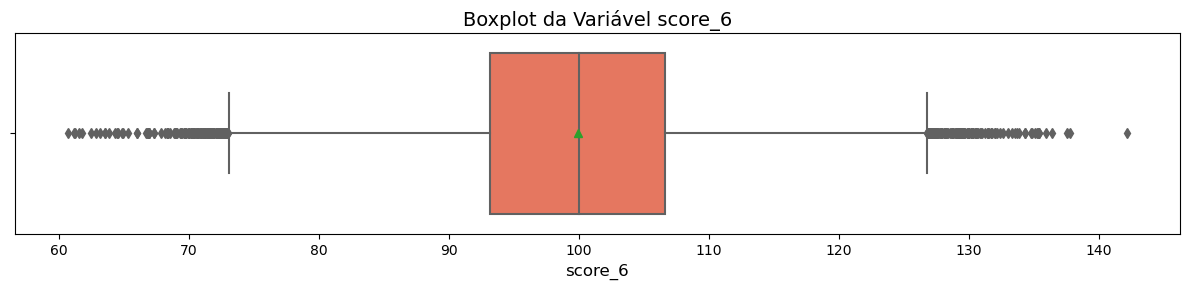

In [340]:
plot_boxplot('score_6')

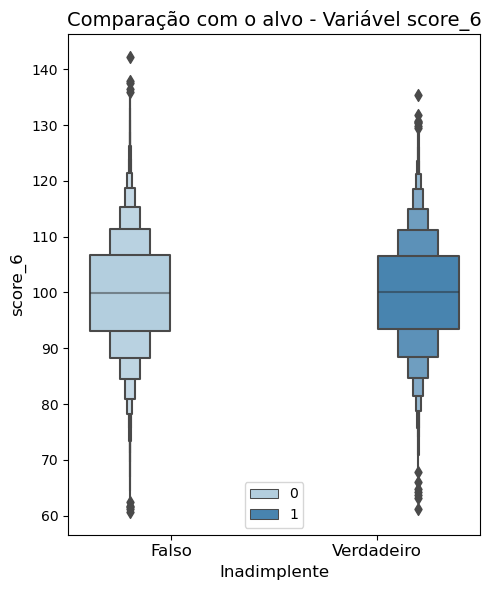

In [341]:
comparison_boxplot('score_6')

### Imputar valores ausentes

#### Critérios para remoção de variáveis:

* Baixo poder preditivo (e.g `facebook_profile`, `profile_phone_number`);
* Baixa interpretabilidade devido a codificação (`state`, `job_name`);
* Dificíl formatação dos dados que dificulta a interpretação (e.g `user_agent`, `profile_tags`);
* Possuir apenas um valor único (e.g `channel`).


In [356]:
cred_risk_df_clean = cred_risk_df.copy()

cols_to_drop = ['target_fraud', 'external_data_provider_fraud_score',
                'ids', 'email', 'external_data_provider_first_name',
                'profile_phone_number', 'profile_tags', 'facebook_profile',
                'user_agent', 'state', 'zip', 'job_name', 'channel',
                'shipping_zip_code', 
                'external_data_provider_credit_checks_last_month',
                'application_time_applied', 'reason', 'real_state', 
                'external_data_provider_credit_checks_last_year',
                'external_data_provider_credit_checks_last_2_year']

for col in cols_to_drop:
    if col in cred_risk_df_clean.columns.tolist():
        
        cred_risk_df_clean.drop(col, axis = 1, inplace = True)

print('Nova Dimensão do Conjunto')
print(f'\nEntradas: {cred_risk_df_clean.shape[0]}',
      f'\nVariáveis: {cred_risk_df_clean.shape[1]}')

Nova Dimensão do Conjunto

Entradas: 41273 
Variáveis: 23


Variáveis que iremos imputar o valor da mediana:

* `credit_limit`
* `external_data_provider_email_seen_before`
* `last_amount_borrowed`
* `ok_since`

Variáveis que iremos imputar o valor zero:

* `last_borrowed_in_months`
* `n_issues`
* `n_bankruptcies`

In [ ]:
# Instanciando os imputers numérico e categórico
num_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
cat_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# Colunas cujas entradas nulas serão preenchidas por zero 
cols_to_fill_0 = ['last_borrowed_in_months', 'n_issues', 'n_bankruptcies']
isna = cred_risk_df[cols_to_fill_0].isna().sum()[0]

# Substituir valores nulos por zero
if isna > 0:
   cred_risk_df.loc[:, cols_to_fill_0] = cred_risk_df.loc[:, cols_to_fill_0].replace({np.nan: 0})

# Filtro de variáveis numéricas e categóricas
num_cols = cred_risk_df.select_dtypes(include = 'float64').columns
cat_cols = cred_risk_df.select_dtypes(include = 'object').columns

median_cols = [col for col in num_cols if col not in cols_to_fill_0]
isna_2 = cred_risk_df[median_cols].isna().sum()[-2]

# Substituir valores nulos pela mediana
if isna_2 > 0:
    num_imputer = num_imputer.fit(cred_risk_df.loc[:, median_cols])
    cred_risk_df.loc[:, median_cols] = num_imputer.transform(cred_risk_df.loc[:, median_cols])

isna_3 = cred_risk_df['marketing_channel'].isna().sum()

# Substituir valores nulos pela moda
if isna_3 > 0:
    cat_imputer = cat_imputer.fit(np.array(cred_risk_df.loc[:, 'marketing_channel']).reshape(-1, 1))
    cred_risk_df.loc[:, 'marketing_channel'] = cat_imputer.transform(np.array(cred_risk_df.loc[:, 'marketing_channel']).reshape(-1, 1))

### Feature Engineering de longitude e latitude

In [345]:
cred_risk_df_clean.loc[~cred_risk_df_clean['lat_lon'].isna(), 'latitude'] = cred_risk_df_clean.loc[~cred_risk_df_clean['lat_lon'].isna(), 'lat_lon'].apply(lambda j: str(j).split(',')[0].strip('()'))
cred_risk_df_clean.loc[~cred_risk_df_clean['lat_lon'].isna(), 'longitude'] = cred_risk_df_clean.loc[~cred_risk_df_clean['lat_lon'].isna(), 'lat_lon'].apply(lambda j: str(j).split(',')[1].strip('()'))

cred_risk_df_clean['latitude'] = cred_risk_df_clean['latitude'].astype('float64')
cred_risk_df_clean['longitude'] = cred_risk_df_clean['longitude'].astype('float64')

if 'lat_lon' in cred_risk_df_clean.columns.tolist():
    cred_risk_df_clean.drop(columns = ['lat_lon'], axis = 1, inplace = True)

In [346]:
cred_risk_df_clean['latitude'].describe(), cred_risk_df_clean['longitude'].describe()

(count    40023.000000
 mean       -14.791625
 std          8.215476
 min        -33.627565
 25%        -21.685749
 50%        -15.610500
 75%         -7.132135
 max          4.262929
 Name: latitude, dtype: float64,
 count    40023.000000
 mean       -46.733562
 std          7.587245
 min        -73.324849
 25%        -51.110785
 50%        -46.514229
 75%        -40.546241
 max        -32.408788
 Name: longitude, dtype: float64)

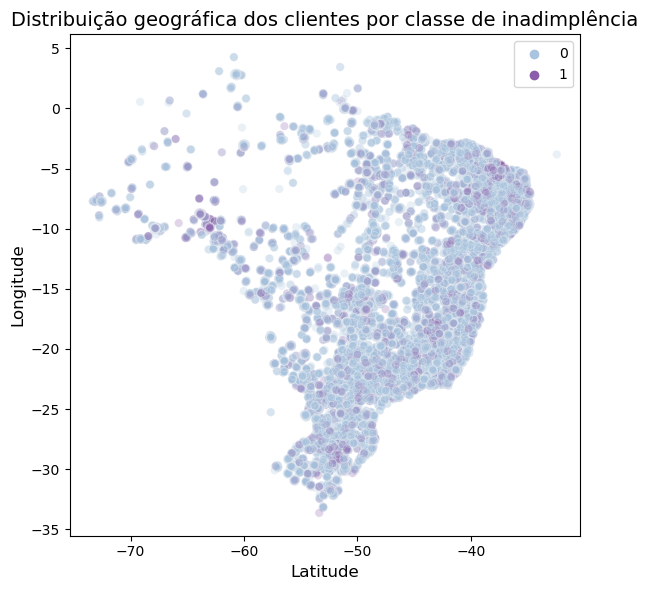

In [353]:
fig, ax = plt.subplots(figsize = (6, 6))

sns.scatterplot(cred_risk_df_clean, 
                x = 'longitude', 
                y = 'latitude',
                hue = 'target_default',
                palette = 'BuPu',
                alpha = .25)

ax.set_title('Distribuição geográfica dos clientes por classe de inadimplência', fontsize = 14)
ax.set_xlabel('Latitude', fontsize = 12)
ax.set_ylabel('Longitude', fontsize = 12)

ax.legend()

fig.tight_layout()

### Tipos das variáveis no conjunto de dados limpo

In [348]:
int_cols = ['ok_since', 'last_borrowed_in_months',
            'credit_limit', 'n_issues',
            'external_data_provider_email_seen_before',
            'n_bankruptcies', 'n_defaulted_loans',
            'n_accounts', 'reported_income',
            'application_time_in_funnel', 'score_3']

for col in int_cols:
    cred_risk_df_clean.loc[:, col] = cred_risk_df_clean.loc[:, col].astype('int64')

cred_risk_df_clean.dtypes

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7356\679787062.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cred_risk_df_clean.loc[:, col] = cred_risk_df_clean.loc[:, col].astype('int64')


target_default                                int32
score_1                                      object
score_2                                      object
score_3                                       int64
score_4                                     float64
score_5                                     float64
score_6                                     float64
risk_rate                                   float64
last_amount_borrowed                        float64
last_borrowed_in_months                       int64
credit_limit                                  int64
income                                      float64
ok_since                                      int64
n_bankruptcies                                int64
n_defaulted_loans                             int64
n_accounts                                    int64
n_issues                                      int64
application_time_in_funnel                    int64
external_data_provider_email_seen_before      int64
marketing_ch

In [349]:
cred_risk_df_clean

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_email_seen_before,marketing_channel,reported_income,shipping_state,latitude,longitude
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350,101.800832,0.259555,108.427273,0.40,25033.920,36,...,0,18,18,444,51,Invite-email,57849,BR-MT,-29.151546,-51.138646
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370,97.062615,0.942655,92.002546,0.24,12010.915,0,...,0,14,14,346,17,Radio-commercial,4902,BR-RS,-19.687711,-47.941515
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360,100.027073,0.351918,112.892453,0.29,7207.920,36,...,0,10,0,6,9,Waiting-list,163679,BR-RR,-28.748024,-51.867279
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510,101.599485,0.987673,94.902491,0.32,12010.915,0,...,0,19,19,406,38,Waiting-list,1086,BR-RN,-17.520650,-39.758011
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500,98.474289,0.532539,118.126207,0.18,12010.915,0,...,0,11,0,240,46,Invite-email,198618,BR-MT,-16.574259,-39.909901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280,96.379531,0.416693,103.667082,0.17,14766.420,36,...,0,7,7,72,7,Facebook,73417,BR-GO,-22.486891,-44.909011
44996,0,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370,96.124977,0.692196,97.977973,0.27,12010.915,0,...,0,16,16,51,1,Waiting-list,26246,BR-RO,-12.881450,-46.435453
44997,0,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280,102.377780,0.530938,93.687747,0.30,12010.915,0,...,0,6,6,476,27,Waiting-list,101252,BR-SP,-23.888982,-50.645313
44998,1,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240,100.476090,0.214697,86.759074,0.37,12010.915,0,...,0,10,10,35,2,Instagram,129844,BR-SP,-5.147699,-37.983868
